<a href="https://colab.research.google.com/github/Equipe16-IAA/IAA012-FrameworksIA/blob/main/03_Recomendacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 - Sistemas de Recomendação

---

# Exercico 03: Criar um sistema de recomendação de livro

#### 1. Importação das bibliotecas

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
#### 2. Importação dos dados

In [5]:
!wget https://marlonprudente.eng.br/files/Base_livros.csv

df = pd.read_csv("Base_livros.csv")
df.head()

--2024-11-23 11:42:23--  https://marlonprudente.eng.br/files/Base_livros.csv
Resolving marlonprudente.eng.br (marlonprudente.eng.br)... 138.36.12.12
Connecting to marlonprudente.eng.br (marlonprudente.eng.br)|138.36.12.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12843775 (12M) [application/octet-stream]
Saving to: ‘Base_livros.csv’

Base_livros.csv     100%[===================>]  12.25M  6.99MB/s    in 1.8s    

2024-11-23 11:42:26 (6.99 MB/s) - ‘Base_livros.csv’ saved [12843775/12843775]



<ipython-input-5-92ac0f28e27d>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Base_livros.csv")


,ISBN,Titulo,Autor,Ano,Editora,ID_usuario,Notas,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,276725,0,NaN,NaN,NaN,NaN,NaN,NaN
1,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,276726,2,NaN,NaN,NaN,NaN,NaN,NaN
2,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,276727,6,NaN,NaN,NaN,NaN,NaN,NaN
3,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,276729,1,NaN,NaN,NaN,NaN,NaN,NaN
4,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,276729,9,NaN,NaN,NaN,NaN,NaN,NaN


---
#### 3. Conversão de userId e movieId para categoria

In [ ]:
# userId e movieId não estão no formato certo para usar
# Embeddings > devem ser categóricos

df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes

df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

In [ ]:
# Dimensões
N = len(set(df.new_user_id))
M = len(set(df.new_movie_id))

# dimensão do embedding (tentar outros)
K = 10

#### 4. Criar o modelo

In [ ]:
# usuário
u = Input(shape=(1,))
u_emb = Embedding(N, K)(u) # saída : num_samples, 1, K
u_emb = Flatten()(u_emb)   # saída : num_samples, K

# filme
m = Input(shape=(1,))
m_emb = Embedding(M, K)(m)  # saída : num_samples, 1, K
m_emb = Flatten()(m_emb)    # saída : num_samples, K

x = Concatenate()([u_emb, m_emb])

x = Dense(1024, activation="relu")(x)
x = Dense(1)(x)

model = Model(inputs=[u, m], outputs=x)

#### 5. Compilação do modelo

In [ ]:
model.compile(
    loss="mse",
    optimizer=SGD(learning_rate=0.08, momentum=0.9)
)

#### 6. Separação dos dados e pré-processamento


In [ ]:
user_ids, movie_ids, ratings = shuffle(df.new_user_id, df.new_movie_id, df.rating)

Ntrain = int(0.8 * len(ratings)) # separar os dados 80% x 20%

train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]
test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]

# centralizar as notas
avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

#### 7. Treinamento do modelo

In [ ]:
epochs = 25
r = model.fit(
    x=[train_user, train_movie],
    y=train_ratings,
    epochs=epochs,
    batch_size=1024,
    verbose=2, # não imprime o progresso
    validation_data=([test_user, test_movie], test_ratings)
)

Epoch 1/25
15626/15626 - 79s - loss: 0.7644 - val_loss: 0.7186 - 79s/epoch - 5ms/step
Epoch 2/25
15626/15626 - 60s - loss: 0.6985 - val_loss: 0.6964 - 60s/epoch - 4ms/step
Epoch 3/25
15626/15626 - 68s - loss: 0.6776 - val_loss: 0.6829 - 68s/epoch - 4ms/step
Epoch 4/25
15626/15626 - 63s - loss: 0.6629 - val_loss: 0.6760 - 63s/epoch - 4ms/step
Epoch 5/25
15626/15626 - 64s - loss: 0.6515 - val_loss: 0.6674 - 64s/epoch - 4ms/step
Epoch 6/25
15626/15626 - 64s - loss: 0.6380 - val_loss: 0.6574 - 64s/epoch - 4ms/step
Epoch 7/25
15626/15626 - 66s - loss: 0.6209 - val_loss: 0.6486 - 66s/epoch - 4ms/step
Epoch 8/25
15626/15626 - 61s - loss: 0.6081 - val_loss: 0.6428 - 61s/epoch - 4ms/step
Epoch 9/25
15626/15626 - 68s - loss: 0.5989 - val_loss: 0.6407 - 68s/epoch - 4ms/step
Epoch 10/25
15626/15626 - 64s - loss: 0.5907 - val_loss: 0.6359 - 64s/epoch - 4ms/step
Epoch 11/25
15626/15626 - 64s - loss: 0.5825 - val_loss: 0.6349 - 64s/epoch - 4ms/step
Epoch 12/25
15626/15626 - 63s - loss: 0.5746 - val_l

#### 8. Plotar a função de perda

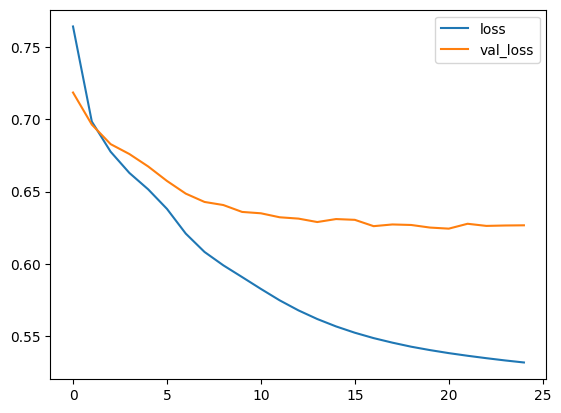

In [ ]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

### 9. Recomendações para o usuário 73023

In [ ]:
# Gerar o array com o usuário único
# repete a quantidade de filmes
input_usuario = np.repeat(a=73023, repeats=M)
film = np.array(list(set(movie_ids)))

preds = model.predict( [input_usuario, film] )

# descentraliza as predições
rat = preds.flatten() + avg_rating

# índice da maior nota
idx = np.argmax(rat)

print("Recomendação: Filme - ", film[idx], " / ", rat[idx] , "*")

836/836 [==============================] - 2s 2ms/step
Recomendação: Filme -  2873  /  4.2274575 *


---
## Exemplo Extra - Recomendação usando TensorFlow Recommenders

### 1. Importações

In [ ]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 3.1 MB/s eta 0:00:00


In [ ]:
from typing import Dict, Text

import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs

### 2. Obtenção dos dados

In [ ]:
# Dados de classificações
ratings = tfds.load('movielens/100k-ratings', split="train")
# Recursos de todos os filmes disponíveis
movies = tfds.load('movielens/100k-movies', split="train")

# Seleção das features básicas: título do filme e ID do usuário
ratings = ratings.map(lambda x: {
    "movie_title": x["movie_title"],
    "user_id": x["user_id"]
})
movies = movies.map(lambda x: x["movie_title"])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-ratings/incomplete.4XODYE_0.1.1/movielens-train.tfrecord*..…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-ratings/0.1.1. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1682 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-movies/incomplete.OE5Q9Q_0.1.1/movielens-train.tfrecord*...…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-movies/0.1.1. Subsequent calls will reuse this data.


### 3. Vocabulários para converter IDs de usuários e títulos de filmes em índices inteiros para incorporar camadas

In [ ]:
user_ids_vocabulary = tf.keras.layers.StringLookup(mask_token=None)
user_ids_vocabulary.adapt(ratings.map(lambda x: x["user_id"]))

movie_titles_vocabulary = tf.keras.layers.StringLookup(mask_token=None)
movie_titles_vocabulary.adapt(movies)

### 4. Definição do modelo

In [ ]:
class MovieLensModel(tfrs.Model):
  # Uso de modelos Keras

  def __init__(
      self,
      user_model: tf.keras.Model,
      movie_model: tf.keras.Model,
      task: tfrs.tasks.Retrieval):
    super().__init__()

    # Configurações das representações de usuários e filmes
    self.user_model = user_model
    self.movie_model = movie_model

    # Retrieval task
    self.task = task

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    # Definição da função loss (perda)

    user_embeddings = self.user_model(features["user_id"])
    movie_embeddings = self.movie_model(features["movie_title"])

    return self.task(user_embeddings, movie_embeddings)

In [ ]:
# Definição de modelos de usuário e filme
user_model = tf.keras.Sequential([
    user_ids_vocabulary,
    tf.keras.layers.Embedding(user_ids_vocabulary.vocab_size(), 64)
])
movie_model = tf.keras.Sequential([
    movie_titles_vocabulary,
    tf.keras.layers.Embedding(movie_titles_vocabulary.vocab_size(), 64)
])

# Definição dos objetivos
task = tfrs.tasks.Retrieval(metrics=tfrs.metrics.FactorizedTopK(
    movies.batch(128).map(movie_model)
  )
)

### 5. Criação do modelo

In [ ]:
model = MovieLensModel(user_model, movie_model, task)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.5))

### 6. Treinamento do modelo

In [ ]:
# Treinamento com 3 epochs
model.fit(ratings.batch(4096), epochs=3)

# Busca por força bruta (Brute-force search) usando os dados de treinamento

index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)

index.index_from_dataset(
    movies.batch(100).map(lambda title: (title, model.movie_model(title))))

Epoch 1/3
25/25 [==============================] - 22s 817ms/step - factorized_top_k/top_1_categorical_accuracy: 3.0000e-05 - factorized_top_k/top_5_categorical_accuracy: 0.0015 - factorized_top_k/top_10_categorical_accuracy: 0.0047 - factorized_top_k/top_50_categorical_accuracy: 0.0435 - factorized_top_k/top_100_categorical_accuracy: 0.0985 - loss: 33084.4452 - regularization_loss: 0.0000e+00 - total_loss: 33084.4452
Epoch 2/3
25/25 [==============================] - 17s 692ms/step - factorized_top_k/top_1_categorical_accuracy: 1.3000e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0048 - factorized_top_k/top_10_categorical_accuracy: 0.0142 - factorized_top_k/top_50_categorical_accuracy: 0.1041 - factorized_top_k/top_100_categorical_accuracy: 0.2101 - loss: 31010.4789 - regularization_loss: 0.0000e+00 - total_loss: 31010.4789
Epoch 3/3
25/25 [==============================] - 17s 693ms/step - factorized_top_k/top_1_categorical_accuracy: 3.7000e-04 - factorized_top_k/top_5_categor

OBS. Busca por força bruta ou busca exaustiva, também conhecido como gerar e testar, é uma técnica de solução de problemas trivial, porém muito geral que consiste em enumerar todos os possíveis candidatos da solução e checar cada candidato para saber se ele satisfaz o enunciado do problema.

### 7. Recomendações para o usuário 42


In [ ]:
_, titles = index(np.array(["42"]))
print(f"Top 3 recommendations for user 42: {titles[0, :3]}")

Top 3 recommendations for user 42: [b'Rent-a-Kid (1995)' b'Run of the Country, The (1995)'
 b'Just Cause (1995)']


---

# Fim do código